# Simple example

This is an example of using [fem](http://lbm.niddk.nih.gov/mckennajp/fem).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fem

In [2]:
n, m, degs = 10, 3, [1]
par = fem.simulate.simulated_parameters(n, m, degs)
data = fem.simulate.simulated_data(par, n, m, o=10.0)

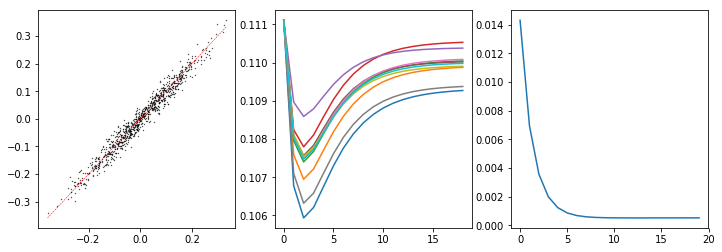

In [3]:
# pos = np.random.randint(n)
x, y = data[:, :-1], data[:, 1:]

p, d = fem.fit.fit(x, y, m_x=m, m_y=m, degs=degs)
p = np.hstack(p)

e = [((par[1] - pi)**2).mean() for pi in p]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
lo, hi = par[1].min(), par[1].max()
tmp = np.linspace(lo, hi)
ax[0].plot(tmp, tmp, 'r--', lw=0.5)
ax[0].scatter(par[1].flatten(), p[-1].flatten(), s=0.1, c='k')
for di in d:
    ax[1].plot(di)
ax[2].plot(e)
plt.show()
plt.close()

In [4]:
print fem.simulate.f90_simulate.simulate_data.__doc__
print fem.fit.f90_fit.fit.__doc__

x = simulate_data(par,degs,p,q,x_idx,n,m,p_sum,l,[nm,pq_sum,k,pdegs_sum])

Wrapper for ``simulate_data``.

Parameters
----------
par : input rank-2 array('d') with bounds (nm,pq_sum)
degs : input rank-1 array('i') with bounds (k)
p : input rank-1 array('i') with bounds (k)
q : input rank-1 array('i') with bounds (k)
x_idx : input rank-1 array('i') with bounds (pdegs_sum)
n : input int
m : input int
p_sum : input int
l : input int

Other Parameters
----------------
nm : input int, optional
    Default: shape(par,0)
pq_sum : input int, optional
    Default: shape(par,1)
k : input int, optional
    Default: len(degs)
pdegs_sum : input int, optional
    Default: len(x_idx)

Returns
-------
x : rank-2 array('i') with bounds (p_sum,l)

iter,par,disc = fit(x,y,ohx_pinv1,ohx_pinv2,ohx_pinv3,q,p,m_y,max_iters,[p_sum,l,ohx_rank,pq_sum,k,iters])

Wrapper for ``fit``.

Parameters
----------
x : input rank-2 array('i') with bounds (p_sum,l)
y : input rank-1 array('i') with bounds (l)
ohx_pinv1 : in